# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("------------------")
print("Beginning Search")
print("------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Search Concluded")
print("-----------------------------")

------------------
Beginning Search
------------------
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : jamestown
Processing Record 3 of Set 1 : narasaraopet
Processing Record 4 of Set 1 : busselton
City not found. Skipping...
Processing Record 5 of Set 1 : berbera
Processing Record 6 of Set 1 : nikolskoye
Processing Record 7 of Set 1 : avera
Processing Record 8 of Set 1 : cape town
Processing Record 9 of Set 1 : maceio
Processing Record 10 of Set 1 : fortuna
Processing Record 11 of Set 1 : kapaa
Processing Record 12 of Set 1 : bluff
Processing Record 13 of Set 1 : paamiut
Processing Record 14 of Set 1 : albany
Processing Record 15 of Set 1 : hofn
Processing Record 16 of Set 1 : rikitea
Processing Record 17 of Set 1 : sisimiut
Processing Record 18 of Set 1 : saiha
Processing Record 19 of Set 1 : turukhansk
Processing Record 20 of Set 1 : nueve de julio
Processing Record 21 of Set 1 : iguguno
Processing Record 22 of Set 1 : broken hill
Processing Record 23 of S

City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 4 : hami
Processing Record 37 of Set 4 : smithers
Processing Record 38 of Set 4 : mazara del vallo
City not found. Skipping...
Processing Record 39 of Set 4 : mahebourg
Processing Record 40 of Set 4 : porto santo
Processing Record 41 of Set 4 : serenje
City not found. Skipping...
Processing Record 42 of Set 4 : caibarien
Processing Record 43 of Set 4 : buala
Processing Record 44 of Set 4 : bonavista
Processing Record 45 of Set 4 : whitehorse
Processing Record 46 of Set 4 : kondinskoye
Processing Record 47 of Set 4 : saldanha
Processing Record 48 of Set 4 : ghanzi
Processing Record 49 of Set 4 : bend
Processing Record 50 of Set 4 : gotsu
Processing Record 0 of Set 5 : cidreira
Processing Record 1 of Set 5 : haines junction
Processing Record 2 of Set 5 : norman wells
City not found. Skipping...
Processing Record 3 of Set 5 : bahia blanca
Processing Record 4 of Set 5 : rincon
Processing Record 5 of Set 5 :

Processing Record 19 of Set 8 : chuy
Processing Record 20 of Set 8 : torbay
Processing Record 21 of Set 8 : gamba
Processing Record 22 of Set 8 : tomatlan
City not found. Skipping...
City not found. Skipping...
Processing Record 23 of Set 8 : jaguariaiva
Processing Record 24 of Set 8 : iquique
Processing Record 25 of Set 8 : jiayuguan
Processing Record 26 of Set 8 : tommot
Processing Record 27 of Set 8 : niquelandia
Processing Record 28 of Set 8 : calabozo
Processing Record 29 of Set 8 : benavente
Processing Record 30 of Set 8 : kosh-agach
Processing Record 31 of Set 8 : kaeo
Processing Record 32 of Set 8 : robertsport
Processing Record 33 of Set 8 : worth
Processing Record 34 of Set 8 : hailey
Processing Record 35 of Set 8 : benghazi
Processing Record 36 of Set 8 : severnoye
Processing Record 37 of Set 8 : orlik
Processing Record 38 of Set 8 : traverse city
City not found. Skipping...
Processing Record 39 of Set 8 : araouane
City not found. Skipping...
Processing Record 40 of Set 8 : 

Processing Record 1 of Set 12 : yulara
Processing Record 2 of Set 12 : asau
Processing Record 3 of Set 12 : jinchang
Processing Record 4 of Set 12 : yurimaguas
Processing Record 5 of Set 12 : kathu
Processing Record 6 of Set 12 : yerbogachen
City not found. Skipping...
Processing Record 7 of Set 12 : oktyabrskiy
Processing Record 8 of Set 12 : luganville
Processing Record 9 of Set 12 : novopokrovka
-----------------------------
Search Concluded
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_info = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})

weather_info.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,98,CL,1580611897,76,-53.15,-70.92,50.00,6.93
1,Jamestown,90,US,1580611897,86,42.10,-79.24,30.99,4.70
2,Narasaraopet,58,IN,1580611898,78,16.25,80.07,75.70,5.53
3,Busselton,0,AU,1580611898,28,-33.65,115.33,80.01,3.74
4,Berbera,57,SO,1580611898,73,10.44,45.01,73.90,4.76


In [5]:
weather_info.to_csv("cities.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

This data shows that the temperature decreases more in the north than it does in the south.


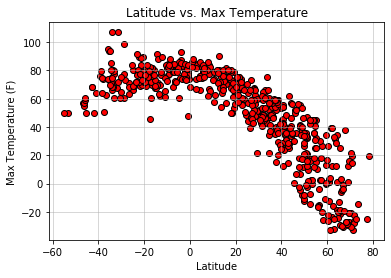

In [6]:
plt.scatter(weather_info["Lat"], weather_info["Max Temp"], facecolor = "red", edgecolor = "black")

plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("This data shows that the temperature decreases more in the north than it does in the south.")

plt.savefig("../Images/Latitude vs Max Temperature.png")

#### Latitude vs. Humidity Plot

This data shows that the southern hemisphere had a higher range of humidity.


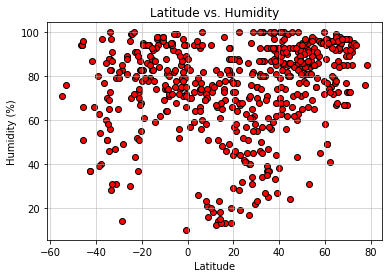

In [7]:
plt.scatter(weather_info["Lat"], weather_info["Humidity"], facecolor = "red", edgecolor = "black")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("This data shows that the southern hemisphere had a higher range of humidity.")

plt.savefig("../Images/Latitude vs Humidity.png")

#### Latitude vs. Cloudiness Plot

This data shows that cloudiness is not depended on latitude.


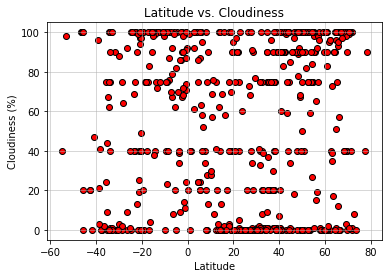

In [8]:
plt.scatter(weather_info["Lat"], weather_info["Cloudiness"], facecolor = "red", edgecolor = "black")

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("This data shows that cloudiness is not depended on latitude.")

plt.savefig("../Images/Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

This data shows that wind is not depended on latitude.


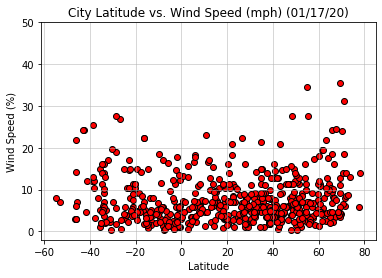

In [9]:
plt.scatter(weather_info["Lat"], weather_info["Wind Speed"], facecolor = "red", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("This data shows that wind is not depended on latitude.")

plt.savefig("../Images/Latitude vs Wind Speed (mph).png")

## Linear Regression

In [10]:
northern_hemisphere = weather_info.loc[weather_info["Lat"] >= 0]
southern_hemisphere = weather_info.loc[weather_info["Lat"] < 0]

In [11]:
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


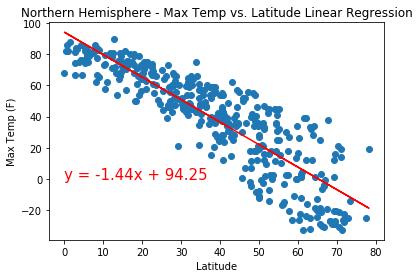

In [12]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.37
The max temp relationship to latitude shows that the max temp is higher when at the equator.


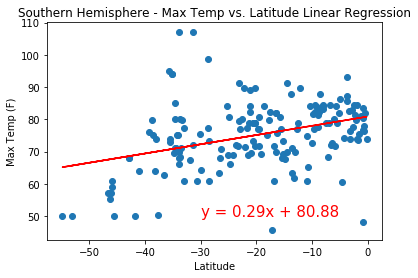

In [13]:
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print("The max temp relationship to latitude shows that the max temp is higher when at the equator.")

plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.4


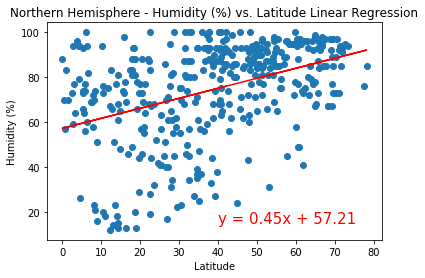

In [14]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.21
The humidity relationship has a positive correlation in both the northern and southern hemisphere.


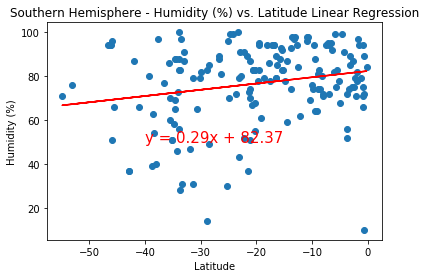

In [15]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print("The humidity relationship has a positive correlation in both the northern and southern hemisphere.")

plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.2


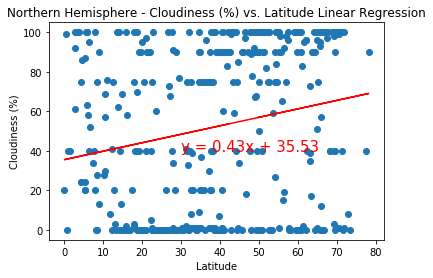

In [16]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 30, 40)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28
The cloudiness relationship has a positive correlation in both the northern and southern hemisphere, but the data is scattered which would suggest a weak correlation.


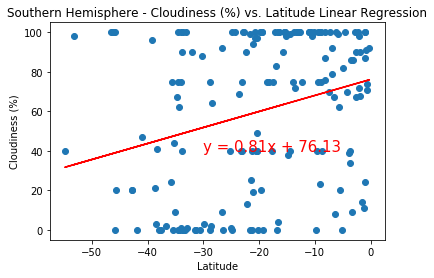

In [17]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print("The cloudiness relationship has a positive correlation in both the northern and southern hemisphere, but the data is scattered which would suggest a weak correlation.")

plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.14


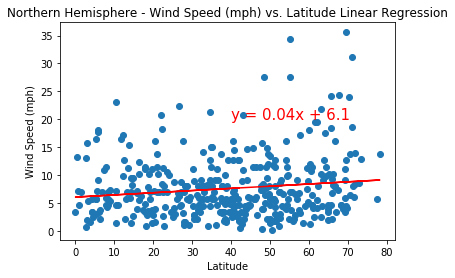

In [18]:
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27
The wind speed correlation seems to be weak in both hemispheres even with one being positive and one being negative correlations.


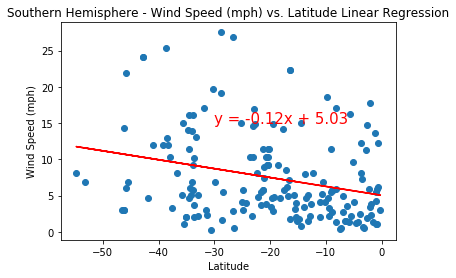

In [19]:
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -30, 15)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print("The wind speed correlation seems to be weak in both hemispheres even with one being positive and one being negative correlations.")

plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")